# Проект 2. Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Цель - научиться определять рыночную стоимость объектов недвижимости. Основная задача - установить параметры для построения автоматизированной системы, отслеживающей аномалии и мошенническую деятельность.

##  План проекта

1. [Изучение общей информации](#introduction) <br>
2. [Предобработка данных](#paragraph2) <br>
   2.1 [Заполнение пропусков](#subparagraph1) <br>
   2.2 [Преобразование типа данных](#subparagraph2) <br>
3. [Расчет и добавление в таблицу новых параметров и категорий](#paragraph3) <br> 
4. [Исследовательский анализ данных](#paragraph4) <br> 
   4.1 [Изучение распределения параметров площади, цены, числа комнат, высоты потолков](#subparagraph3) <br>
   4.2 [Изучение зависимости цены от площади, числа комнат, удаленности от центра и этажа, на котором находится квартира](#subparagraph4) <br>
   4.3 [Срез по населенным пунктам](#subparagraph5) <br>
   4.4 [Изучение квартир в СПб](#subparagraph6) <br>
5. [Общий вывод](#paragraph5) <br>

## Описание данных 

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Шаг 1. Изучение общей информации
<a name="introduction"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
#посмотрим на строки датасета 
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
#проверим, есть ли полные дубликаты 
data.duplicated().sum()

0

### Вывод

Датасет включает в себя 22 столбца (2 переменные имеют логический тип, 17 - числовой тип, 3 - объекта) и 23699 строк. Количество значений в столбцах различается, что свидетельствует о наличии пропущенных значений. 

### Шаг 2. Предобработка данных
<a name="paragraph2"></a>

#### 2.1 Заполнение пропусков
<a name="subparagraph1"></a>

In [6]:
#выявим столбцы с пропущенными значениями 
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

2.1 Обнаружены пропущенные значения в столбцах 'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 
'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'.

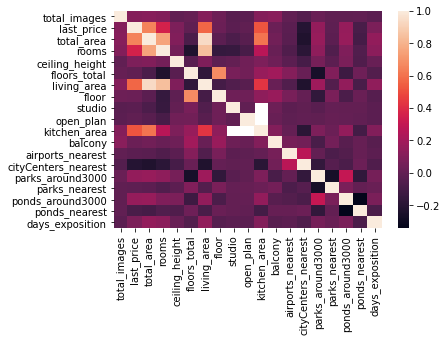

In [7]:
#посмотрим на тепловую карту корреляций, чтобы выявить потенциальное наличие корреляций с переменными, на основании значений которых, можно заполнять пропуски в столбцах
sns.heatmap(data.corr());

In [8]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


Результаты анализа пропусков и корреляций:
1. столбец 'ceiling_height' - 38,8% значений пропущено, не выявлена значительная корреляция ни с одной переменной;
2. столбец 'floors_total' - 0,36% значений пропущено, выявлена корреляция с 'floor' (+0,678);
3. столбец 'living_area' - 8,03% значений пропущено, выявлена корреляция с 'total_area' (+0,94) и 'rooms' (+0,85);
4. столбец 'is_apartment' -  88,3% значений пропущено; 
5. столбец 'kitchen_area' - 9,6% значений пропущено, выявлена корреляция с 'living_area' (+0,429) и с 'total_rea' (+0,609);
6. столбец 'balcony' - 48,6% значений пропущено, не вывлена значительная корреляция ни с одной переменной; 
7. столбец 'locality_name' - 0,21% значений пропущено, не выявлена значимая корреляция ни с одной переменной; 
8. столбец 'airports_nearest' - 23,4% значений пропущено, выявлена корреляция с cityCenters_nearest' (+0,272) => аэропорты по-видимому находятся чаще всего в отдалении от центра;
9. столбец'cityCenters_nearest' - 23,4% значений пропущено, выявлена корреляция с 'living_area' (-0,231) => с приближением к центру площадь квартиры снижается;
10. столбец 'parks_around3000' - 23,3% значений пропущено, выявлена корреляция с 'floors_total' (-0,253), c 'parks_nearest' (-0,259), с 'ponds_around3000' (+0,304): т.е. рядом с парками вероятнее всего находятся малоэтажные дома, если есть парки, то вероятнее всего рядом также будет водоем; 
11. столбец 'parks_nearest' - 65,9% значений пропущено, выявлена корреляция с 
'parks_around3000' (-0,260); 
13. столбец 'ponds_around3000' - 23,3% значений пропущено, выявлена корреляция 'parks_around3000' (+0,304) и с 'ponds_nearest' (-0,342);
14. столбец 'ponds_nearest' - 61,6% значений пропущено, выявлена корреляция с 'ponds_around3000' (-0,342);
15. столбец days_exposition - 13,4% значений пропущено, не выявлена значимая корреляция с чем-либо. 

In [9]:
#т.к. не выявлена корреляция высоты потолков ни с одной переменной в датасете, заподним пропуски медианными значениями
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [10]:
#с учетом, что коррелция между этажом квартиры ('floor') и этажностью дома ('floors_total') составляет 0,68, заполним пропуски в столбце 'floor'
#найдем медианное значение общего числа этажей в зависимости от текущего этажа
floors_dict = data.groupby('floor')['floors_total'].median()
floors_dict = floors_dict.to_dict()
#создадим функцию для заполнения пропусков в столбце 'floors_total'
def floors_missing_values(row):
    if pd.isna(row['floors_total']):
        row['floors_total'] == floors_dict[row['floor']]
        return floors_dict[row['floor']]
    else:
        return row['floors_total']
#заполним пропуски в столбце 'floors_total'
data['floors_total'] = data.apply(floors_missing_values, axis=1)
#проверим заполнение пропусков
data['floors_total'].isna().sum()

0

In [11]:
#заполним пропуски в столбце 'living_area' с учетом выявленной корреляции с общей площадью квартиры и количеством комнат
data['living_area_index'] = data['living_area']/data['total_area']
living_area_dict = data.groupby('rooms').median()['living_area_index']
living_area_dict = living_area_dict.to_dict()
#создадим функцию для заполнения пропусков в столбце 'living_area'
def living_area_index_missing_values(row):
    if pd.isna(row['living_area_index']):
        row['living_area_index'] == living_area_dict[row['rooms']]
        return living_area_dict[row['rooms']]
    else:
        return row['living_area_index']
#заполним пропуски в столбце 'living_area_index'
data['living_area_index'] = data.apply(living_area_index_missing_values, axis=1)
data['living_area'] = data['living_area'].fillna(data['living_area_index']*data['total_area'])
#проверим заполняемость пропусков
data['living_area'].isna().sum()

0

In [12]:
#создадим стоблец с нежилой площадью 'non_residential_area'
data['non_residential_area'] = data['total_area'] - data['living_area']
#вычислим корреляцию с плоащью кухни
data['kitchen_area'].corr(data['non_residential_area'])

0.7311095150292755

In [13]:
#с учетом выявленной корреляции заполним пропуски в столбце 'kitchen_area'
#создадим стобец с индексами для соответствующих квартилей нежилой площади
data['non_residential_area_index'] = pd.qcut(data['non_residential_area'], q=4, labels=['1', '2', '3', '4'])
#найдем медианное значение 'kitchen_area' для соответствующих значений 
d = data.groupby('non_residential_area_index')['kitchen_area'].median()
kitchen_area_dict = d.to_dict()
#создадим функцию для заполнения пропусков в столбце 'kitchen_area'
def kitchen_area_missing_values(row):
    if pd.isna(row['kitchen_area']):
        row['kitchen_area'] == kitchen_area_dict[row['non_residential_area_index']]
        return kitchen_area_dict[row['non_residential_area_index']]
    else:
        return row['kitchen_area']
#заполним пропуски в столбце 'kitchen_area' c помощью созданной функции
data['kitchen_area'] = data.apply(kitchen_area_missing_values, axis=1)
#проверим заполнение пропусков
data['kitchen_area'].isna().sum()

0

In [14]:
#предположим, что количество дней размещения объявления зависит от дня месяца, в котором оно было размещено
#приведем значение столбца 'first_day_exposition' к формату даты 
data['date'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
#извлечем день месяца из столбца
data['day'] = pd.DatetimeIndex(data['date']).day
#заполним пропуски в 'days_exposition' на основании значений в столбце 'day'
#будет отталкиваться от медианного значения в заивисимости от дня месяца
d_1 = data.groupby('day')['days_exposition'].median()
days_expos_dict = d_1.to_dict()
#создадим функцию для заполнения пропусков в столбце 'days_exposition'
def days_exposition_missing_values(row):
    if pd.isna(row['days_exposition']):
        row['days_exposition'] == days_expos_dict[row['day']]
        return days_expos_dict[row['day']]
    else:
        return  row['days_exposition']
#заполним пропуски в столбце 'days_exposition'
data['days_exposition'] = data.apply(days_exposition_missing_values, axis=1)
#проверим заполняемость пропусков
data['days_exposition'].isna().sum()

0

In [15]:
#предположим, что если пропущено значение с принадлежностью к типу 'апартаменты', то квартира не является апартаментами
data['is_apartment'].fillna(value=False, inplace = True)

In [16]:
#предположим, что в случае наличия балконов, парков и водоемов рядом с квартирой, ее продавец обязательно бы указал данную информацию в объявлении
#если данная информация отсутствует, значит балконов, парков и водомоев поблизости нет
for i in ['balcony', 'parks_around3000', 'ponds_around3000']:
    data[i].fillna(value=0, inplace = True)

*Результат заполнения пропусков*
- пропуски в столбце 'ceiling_height' заполнены медианными значениями;
- пропуски в столбце 'floors_total' заполнены медианными значениями на основании столбца 'floor';
- пропуски в столбце 'living_area' заполнены медианными значениями на основании соотношения жилой и общей площади квартиры, сгруппированного по количеству комнат;
- пропуски в столбце 'kitchen_area' заполнены медианными значениями на основании вычисленного значения нежилой площади; 
- пропуски в столбце 'days_exposition' заполнены на основании даты публикации;
- с учетом предположения, что если квартира является апартаментами, владелец точно указал бы это в объявлении, пропуски в столбце 'is_apartment' заполнены значениями 'False';
- исходя из предпосылки, что у продавца квартиры есть существенные стимулы указывать в объявлении количество балконов, парков и водоемов, поскольку они повышают ее стоимость, пропуски являются индикатором их отсутствия (они заменены на нулевое значение).

Пропуски в столбцах 'locality_name', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest' оставим, поскольку они являются не случайными и значительной корреляции с другими столбцами не было выявлено. 



#### 2.2. Преобразование типа данных
<a name="subparagraph2"></a>

In [17]:
#приведем значения в столбцах 'total_area', 'floors_total', 'living_area', 'last_price'
#а также в столбцах 'kitchen_area', 'balcony', 'airports_nearest', ' cityCenters_nearest'
# 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'
# 'days_exposition' к целочисленному виду для экономии памяти и упрощения дальнейших вычислений.
for i in ['total_area', 'last_price',  'floors_total', 'living_area', 'rooms', 'ceiling_height', 'kitchen_area', 'balcony', 'parks_around3000',  'ponds_around3000', 'days_exposition']:
    data[i] = data[i].astype(int)

Потенциальные причины возникновения пропусков в данных:
    
- пропуски в столбцах с высотой потолков и жилой площадью могут быть неслучайными - продавец мог не указать их преднамеренно, не желая применять дисконт к цене с учетом данных параметров (низкие потолки или низкое соотношение жилой и общей площади может снизить спрос покупателей);
- пропуски в столбцах с количеством этажей в доме и площадью кухни могут быть случайными - продавец забыл указать данные параметры в объявлении; 
- пропуск в столбце 'is_apartment' тоже может быть случайным: по умолчанию продаваемая квартира не является апартаментами и продавец не стал обращат внимание на данное поле и отмечать опцию "не является апартаментами"; 
- пропуски в столбце с количеством дней, в течение которых было размещено объявление, могли возникнуть вследствие технической ошибки (например, система не зарегистрировала дату снятия публикации); 
- пропуски в столбцах 'locality_name', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest' могут быть связаны, например, с ошибками идентификции местоположения квартиры по адресу при автоматическом сборе картографических данных. 

### Шаг 3. Расчет и добавление в таблицу новых параметров и категорий
<a name="paragraph3"></a>

In [18]:
#добавим в таблицу столбец с ценой квадратного метра
data['price_per_square_meter'] = data['last_price']/data['total_area']

In [19]:
#создадим столбец с днем недели публикации объявления
data['day_week'] = pd.DatetimeIndex(data['date']).dayofweek
week_day_dict = {0: 'понедельник', 1: 'вторник', 2: 'среда', 3: 'четверг', 4: 'пятница', 5: 'суббота', 6: 'воскресенье'}
data['day_week'] = data['day_week'].apply(lambda x: week_day_dict[x])
#создадим столбец с месяцем публикации
data['month'] = pd.DatetimeIndex(data['date']).month
#создадим столбец с годом публикации объявления
data['year'] = pd.DatetimeIndex(data['date']).year

In [20]:
#разделим этажи на три категории: первый, последний, другой
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
#создадим столбец с категорией этажа
data['floor_index'] = data.apply(floor_category, axis=1)

In [21]:
#добавим столбец с соотошением площади кухни и общей площади
data['kitchen_area_index'] = data['kitchen_area']/data['total_area']

### Шаг 4. Исследовательский анализ данных
<a name="paragraph4"></a>

#### 4.1 Изучение распределение параметров площади, цены, числа комнат, высоты потолков
<a name="subparagraph3"></a>

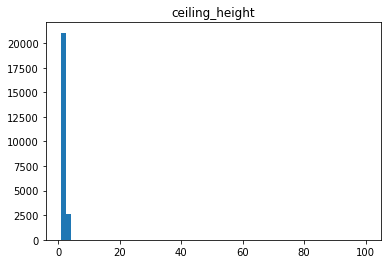

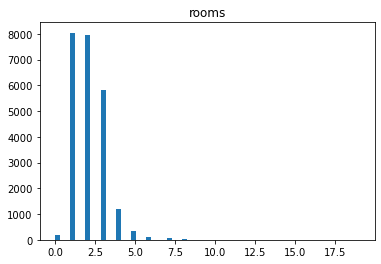

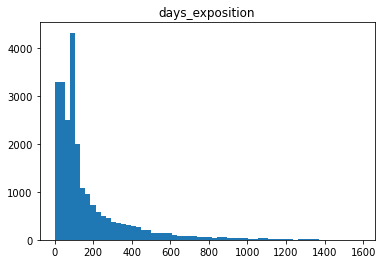

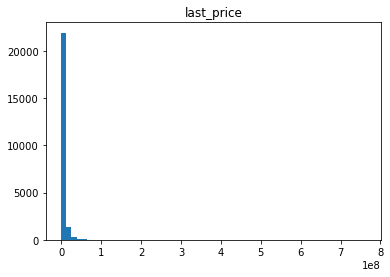

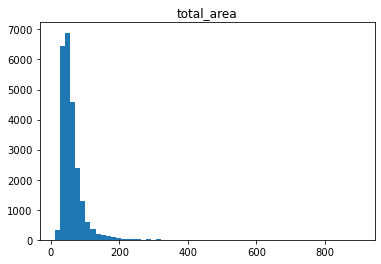

In [22]:
list = {'total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition'}
for i in list:
    plt.hist(x = data[i], bins=60)
    plt.title(i)
    plt.show()

In [23]:
data['total_area'].describe()
#средняя площадь квартиры составляет 60,1 метра
#наблюдаем значительный разброс между максимальным и минимальным значением

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

In [24]:
data['last_price'].describe()
# средняя стоимость квартиры 6,54 млн руб. - вполне адекватная стоимость
#максимальная стоимость составляет 763 млн руб.
#средняя цена квартиры составляет 6,54 млн
#при этом значительный разброс в данных  - стандартное отклонение составляет 10,9 млн руб.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [25]:
data['rooms'].describe()
#среднее количество комнат в квартире - две 
#максимальное количество комнат - 19

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [26]:
data['ceiling_height'].describe()
#средняя высота потолков составляет 2,72 метра 

count    23699.000000
mean         2.142411
std          1.033337
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max        100.000000
Name: ceiling_height, dtype: float64

In [27]:
data['days_exposition'].describe()

count    23699.000000
mean       169.699312
std        206.439026
min          1.000000
25%         45.000000
50%         97.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [28]:
list = {'total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition'}
for i in list:
    print('Среднее значение {} составляет {} и медиана {}'.format (i, round(data[i].mean(), 1), round(data[i].median(), 1)))

Среднее значение ceiling_height составляет 2.1 и медиана 2.0
Среднее значение rooms составляет 2.1 и медиана 2.0
Среднее значение days_exposition составляет 169.7 и медиана 97.0
Среднее значение last_price составляет 6541548.8 и медиана 4650000.0
Среднее значение total_area составляет 60.1 и медиана 52.0


В распределении каждого из рассмотренных параметров наблюдаются толстые хвосты. Особенно высокая вариабельность наблюдается в распределении цены (ст. отклонение составляет 10,9 млн руб. при среднем значении, равном 6,5 млн руб.) и времени продажи (ст. отклонение составляет 206 дней при среднем значении 170 дней).

In [29]:
#Предположим, что значения ниже 5% процентиля и выше 95% являются выбросами. Вычислим соответствующие пороги отсечения.
for i in list:
    quantile_low = data[i].quantile(q=0.05)
    quantile_high = data[i].quantile(q=0.95)
    print('5% процентиль в колонке ' + i + ' соответствует значению', quantile_low, 'и 95% процентиль соответствует значению', quantile_high)

5% процентиль в колонке ceiling_height соответствует значению 2.0 и 95% процентиль соответствует значению 3.0
5% процентиль в колонке rooms соответствует значению 1.0 и 95% процентиль соответствует значению 4.0
5% процентиль в колонке days_exposition соответствует значению 10.0 и 95% процентиль соответствует значению 603.0
5% процентиль в колонке last_price соответствует значению 1870000.0 и 95% процентиль соответствует значению 15300000.0
5% процентиль в колонке total_area соответствует значению 31.0 и 95% процентиль соответствует значению 116.0


In [30]:
#Посмотрим на параметр скошенности распределения значений
for i in list: 
    skewness = data[i].skew()
    print('Параметр скошенности распределения параметра {} составляет {}'.format(i, round(skewness)))

Параметр скошенности распределения параметра ceiling_height составляет 48
Параметр скошенности распределения параметра rooms составляет 2
Параметр скошенности распределения параметра days_exposition составляет 3
Параметр скошенности распределения параметра last_price составляет 26
Параметр скошенности распределения параметра total_area составляет 5


Из полученных значений параметров асимметрии распределения следует их ненормальность (коэф. асимметрии > 0) - значительная скошенность в правую сторону, в особенности для параметров 'ceiling_height' и 'last_price'. Предположим, что значения, выходящие за границы 5% и 95% процентилей, являются выбросами. Создадим срез датасета с исключением крайних значений. Будем также рассматривать продажу, занимающую более 600 дней как слишком медленную, а составляющую менее 10 дней как очень быструю.

In [31]:
#создадим датасет - с отсечением границ на основании порогов в 5% и 95%
good_data = data.query('(1 <= rooms <= 4) & (2.5 <= ceiling_height <= 3.13) & (1870000 <= last_price <= 15300000) & (31 <= total_area <= 116) & (10 < days_exposition < 600)')   

In [32]:
#посмотрим вновь на параметр скошенности распределения
for i in list: 
    skewness = good_data[i].skew()
    print('Параметр скошенности распределения параметра {} составляет {}'.format(i, round(skewness)))

Параметр скошенности распределения параметра ceiling_height составляет 0
Параметр скошенности распределения параметра rooms составляет 0
Параметр скошенности распределения параметра days_exposition составляет 1
Параметр скошенности распределения параметра last_price составляет 0
Параметр скошенности распределения параметра total_area составляет 0


После отсечения аномальных значений удалось устранить скошенность распределения вправо для всех параметров, кроме 'days_exposition'.

#### 4.2 Изучение зависимости цены от площади, числа комнат, удаленности от центра и этажа, на котором находится квартира
<a name="subparagraph4"></a>

In [33]:
#изучим зависимость цены квартиры от ее площади 
copy_good_data = good_data.copy()
copy_good_data['total_area_categories'] = pd.qcut(copy_good_data['total_area'], q=10)
price_area_pivot = copy_good_data.pivot_table(index = 'total_area_categories', values = 'last_price', aggfunc = ['median', 'mean'])
price_area_pivot.columns = ['median_price', 'mean_price']

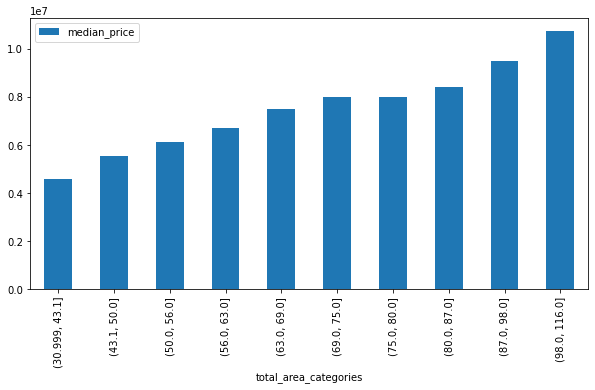

In [34]:
price_area_pivot.sort_values(by = 'median_price', ascending = True).plot(y = 'median_price', kind = 'bar', figsize = (10,5));

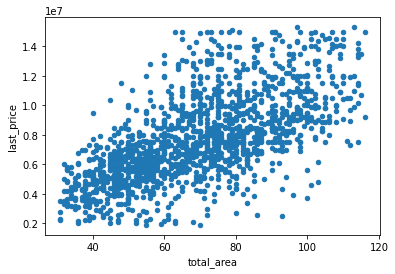

In [35]:
copy_good_data.plot (x = 'total_area', y = 'last_price', kind = 'scatter');

На графике прослеживается положительная зависимость между площадью квартиры и ее стоимостью, но при этом облако точек довольно рассеянное.

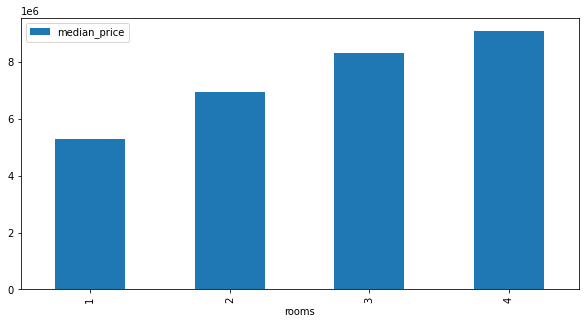

In [36]:
#рассмотрим на зависимость цены от числа комнат в квартире
price_rooms_pivot = good_data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['median'])
price_rooms_pivot.columns = ['median_price']
price_rooms_pivot.sort_values(by = 'median_price', ascending = True).plot(y = 'median_price', kind = 'bar', figsize = (10,5));

*С увеличением числа комнат наблюдается последовательный рост медианной цены.* 

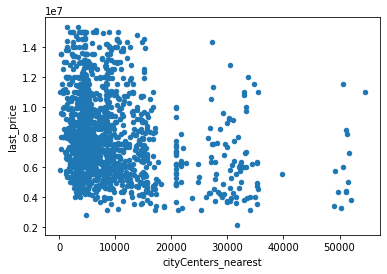

In [37]:
#посмотрим на зависимость цены от расстояния до центра города
copy_good_data.plot (x = 'cityCenters_nearest', y = 'last_price', kind = 'scatter');

*Наблюдается снижение цены квартиры по мере роста удаленности от центра. Снижается концентрация точек вокруг высоких значений цены при отдалении от центра*

In [38]:
#посмотрим на зависимость цены от этажа, на котором находится квартира
floors_pivot = good_data.pivot_table(index = 'floor_index', values = 'last_price', aggfunc = ['median'])
display(floors_pivot)

,median
,last_price
floor_index,
другой,7800000
первый,5900000
последний,7250000


Постором ниже диаграмму размаха для категорий этажа

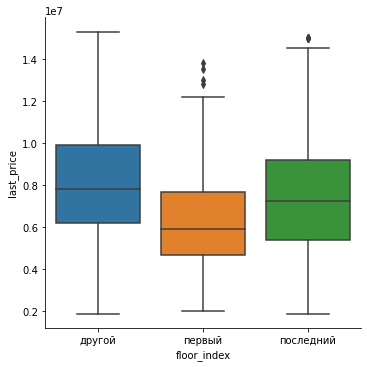

In [39]:
sns.catplot(x="floor_index", y="last_price", kind="box", data=copy_good_data);

*Этаж квартиры влияет на ее стоимость. Медианная стоимость квартиры на первом и последнем этажах на 1,9 млн руб и 550 тыс. руб. ниже, чем на других этажах.*

In [40]:
#посмотрим на зависимость цены от года размещения
year_pivot = good_data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['median'])
year_pivot.columns = ['median_price']
display(year_pivot.sort_values(by = 'median_price', ascending = False))

,median_price
year,
2014,8585256
2019,7700000
2017,7400000
2018,7400000
2015,7300000
2016,7295000


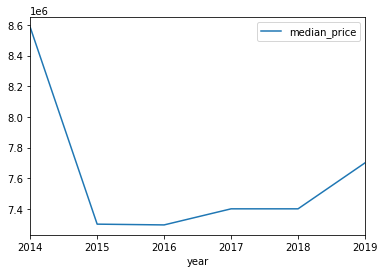

In [41]:
year_pivot['year'] = year_pivot.index
year_pivot.year = pd.to_datetime(year_pivot.year, format='%Y')
year_pivot.plot.line (x = 'year', y = 'median_price');

Год продажи влияет на медианную стоимость продажи, но взаимосвязь неочевидная. Высокая стоимость жилья в 2014 году может быть обусловлена, например, резкой девальвацией рубля и ростом популярности недвижимости как альтернативного инвестиционного актива. После падения в 2015 и 2016 г., с 2017 г. стоимость жилья начала постепенно возрастать.

In [42]:
#посмотрим на зависимость цены от месяца размещения 
month_pivot = good_data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['median'])
month_pivot.columns = ['median_price']
display(month_pivot.sort_values(by = 'median_price', ascending = False))

,median_price
month,
9,7700000
10,7650000
4,7625000
7,7600000
1,7500000
8,7499500
6,7475000
5,7305000
11,7250000


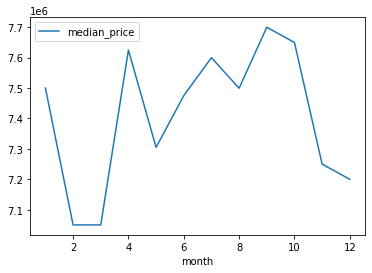

In [43]:
month_pivot.plot.line(y='median_price');

*Направление связи между месяцем продажи и ценой неочевидное. Максимальная стоимость жилья устанавливается в сентябре. Самая низкая медианная стоимость наблюдается в феврале-марте*

In [44]:
#посмотрим на зависимость цены от дня недели
day_week_pivot = good_data.pivot_table(index = 'day_week', values = 'last_price', aggfunc = ['median'])
day_week_pivot.columns = ['median_price']
display(day_week_pivot.sort_values(by = 'median_price', ascending = False))

,median_price
day_week,
среда,7600000
воскресенье,7525000
вторник,7500000
пятница,7500000
четверг,7470000
понедельник,7200000
суббота,7050000


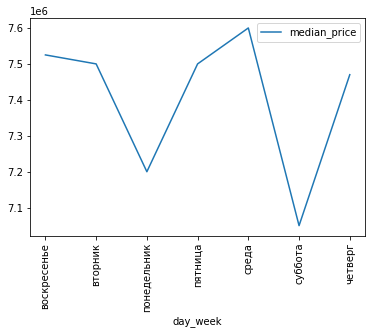

In [45]:
day_week_pivot.plot.line(y='median_price', rot = 90);

*В середине недели (в среду и вторник) продажная стоимость жилья выше, чем в конце недели.*

#### 4.3 Срез по населенным пунктам
<a name="subparagraph5"></a>

In [46]:
#проверим на уникальность значения в столбце 'locality_name'
copy_good_data.locality_name.unique()

array(['Санкт-Петербург', 'деревня Новое Девяткино', 'Павловск',
       'Сестрорецк', 'Колпино', 'Волхов', 'Пушкин', 'Петергоф',
       'Кронштадт', 'посёлок Металлострой', nan, 'поселок Бугры',
       'посёлок городского типа имени Морозова', 'Красное Село', 'Выборг',
       'Сертолово', 'посёлок Ропша', 'Кировск', 'Гатчина',
       'поселок Углово', 'Отрадное', 'посёлок Новый Свет', 'Сосновый Бор',
       'посёлок городского типа Ульяновка', 'Никольское', 'Кингисепп',
       'Луга', 'посёлок Стрельна', 'городской посёлок Новоселье',
       'посёлок Мурино', 'деревня Глинка',
       'поселок городского типа Синявино', 'Пикалёво', 'Приозерск',
       'Всеволожск', 'поселок городского типа Кузьмоловский',
       'поселок Суходолье', 'поселок городского типа имени Свердлова',
       'посёлок Понтонный', 'посёлок Шушары', 'деревня Заневка',
       'Ломоносов', 'Коммунар', 'Тосно', 'деревня Каськово',
       'посёлок городского типа Кузьмоловский', 'посёлок Пудость',
       'Кудрово', 'дер

In [47]:
#переименуем неявные дубликаты населенных пунктов
copy_good_data['locality_name'] = copy_good_data['locality_name'].str.replace('посёлок', 'поселок')
copy_good_data['locality_name'] = copy_good_data['locality_name'].str.replace('коттеджный посёлок', 'поселок')
copy_good_data['locality_name'] = copy_good_data['locality_name'].str.replace('поселок Мурино', 'Мурино')

In [48]:
#выберем 10 населенных пунктов в наибольшим числом объявлений
top_localities = copy_good_data.pivot_table(index = 'locality_name', values = 'last_price', aggfunc = ['count']).reset_index()
top_localities.columns = ['locality_name', 'last_price']
top_localities = top_localities.sort_values(by = 'last_price', ascending = False).iloc[0:10, :]
display(top_localities)

,locality_name,last_price
22,Санкт-Петербург,1293
21,Пушкин,25
2,Выборг,18
7,Колпино,16
3,Гатчина,15
34,деревня Новое Девяткино,15
24,Сестрорецк,13
10,Кронштадт,11
18,Петергоф,9
0,Волхов,7


In [49]:
print('Максимальная стоимость жилья в {}е, минимальная стоимость в {}е.'.format(top_localities.iloc[0, 0], top_localities.iloc[9,0]))

Максимальная стоимость жилья в Санкт-Петербурге, минимальная стоимость в Волхове.


#### 4.4 Изучение квартир в Санкт-Петербурге
<a name="subparagraph5"></a>

In [50]:
#сделаем срез для данных о Санкт-Петербурге
copy_good_data['distance_to_center_km'] = round(copy_good_data['cityCenters_nearest']/1000)
copy_good_data['price_per_km'] = copy_good_data['last_price']/copy_good_data['distance_to_center_km']
data_for_spb = copy_good_data.query('locality_name == "Санкт-Петербург"')

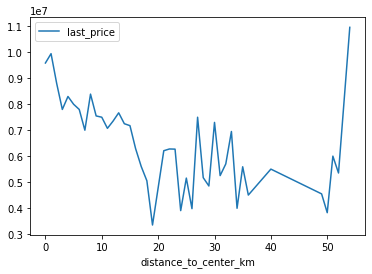

In [51]:
#посмотрим на линейный график
copy_good_data.pivot_table(index = 'distance_to_center_km', values = 'last_price', aggfunc = 'median').plot(kind = 'line', legend = True);

На графике на расстоянии около 10 км от центра можем наблюдать резкое замедление роста стоимости жилья. С учетом данной динамики предположим, что центральной зоной является диапазон до 10 км от центра. 

In [52]:
#Выделим сегмент квартир в центре
data_spb_center = data_for_spb.query('distance_to_center_km < 10')

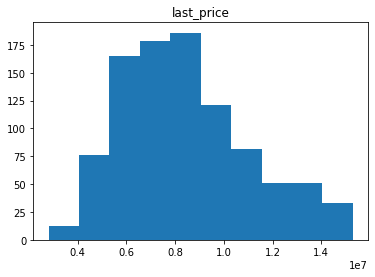

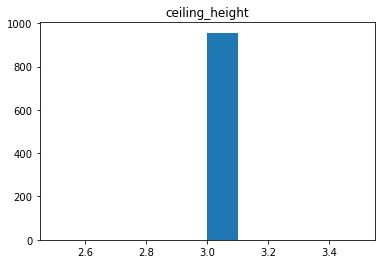

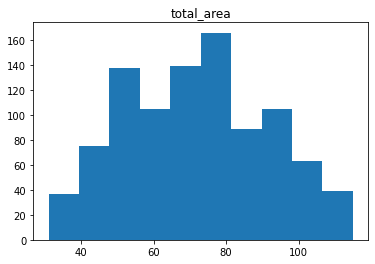

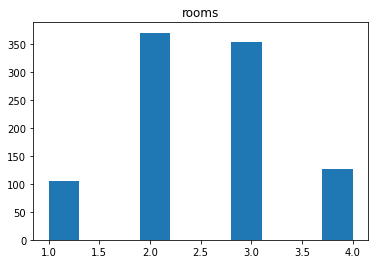

In [53]:
#изучим площадь, цену, число комнат и высоту потолков
list_2 = {'total_area', 'last_price', 'rooms', 'ceiling_height'}
for i in list_2:
    plt.hist(x = data_spb_center[i])
    plt.title(i)
    plt.show()

In [54]:
for i in list_2:
    print ('Медианное значение {} в центральной зоне Санкт-Петербурга составляет {}, среднее значение составляет {}'.format(i, round(data_spb_center[i].median(), 1), round(data_spb_center[i].mean(),1)))
    print('Медианное значение {} в целом по Санкт-Петербургу составляет {}, среднее значение составляет {}'.format(i, round(data_for_spb[i].median(), 1), round(data_for_spb[i].mean(), 1)))

Медианное значение last_price в центральной зоне Санкт-Петербурга составляет 8000000.0, среднее значение составляет 8461357.5
Медианное значение last_price в целом по Санкт-Петербургу составляет 7753921.0, среднее значение составляет 8205392.1
Медианное значение ceiling_height в центральной зоне Санкт-Петербурга составляет 3.0, среднее значение составляет 3.0
Медианное значение ceiling_height в целом по Санкт-Петербургу составляет 3.0, среднее значение составляет 3.0
Медианное значение total_area в центральной зоне Санкт-Петербурга составляет 72.0, среднее значение составляет 71.9
Медианное значение total_area в целом по Санкт-Петербургу составляет 70.0, среднее значение составляет 70.0
Медианное значение rooms в центральной зоне Санкт-Петербурга составляет 3.0, среднее значение составляет 2.5
Медианное значение rooms в целом по Санкт-Петербургу составляет 2.0, среднее значение составляет 2.4


,median_price_Saint_Petersburg,median_price_Saint_Petersburg_center
total_area_categories,,
1,5000000,5281202.5
2,5900000,6000000.0
3,6250000,6300000.0
4,7250000,7700000.0
5,8600000,8757500.0
6,8000000,8000000.0
7,8625000,8500000.0
8,8500000,8400000.0
9,9500000,9500000.0


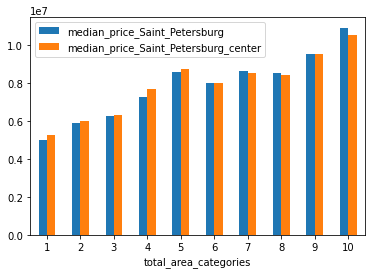

In [55]:
#Изучим зависимость стоимости квартир в целом по Сантк-Петербургу от площади, этажа, числа комнат, высоты потолков
#изучим зависимость цены квартиры от ее площади
copy_data_for_spb = data_for_spb.copy()
copy_data_for_spb['total_area_categories'] = pd.qcut(copy_data_for_spb['total_area'], q=10, labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
price_area_pivot = copy_data_for_spb.pivot_table(index = 'total_area_categories', values = 'last_price', aggfunc = ['median'])
price_area_pivot.columns = ['median_price']
copy_data_spb_center = data_spb_center.copy()
copy_data_spb_center['total_area_categories'] = pd.qcut(copy_data_for_spb['total_area'], q=10, labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
price_area_pivot_center = copy_data_spb_center.pivot_table(index = 'total_area_categories', values = 'last_price', aggfunc = ['median'])
price_area_pivot_center.columns = ['median_price']
price_area_full = price_area_pivot.merge(price_area_pivot_center, on = 'total_area_categories')
price_area_full.columns = ['median_price_Saint_Petersburg', 'median_price_Saint_Petersburg_center']
display(price_area_full)
ax = price_area_full.plot.bar(rot=0)

,median_price_Saint_Petersburg,median_price_Saint_Petersburg_center
floor_index,,
другой,8000000,8389000
первый,6200000,6600000
последний,7800000,8000000


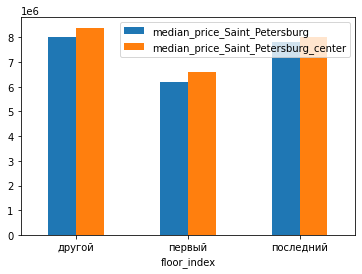

In [56]:
#посмотрим на зависимость цены от этажа, на котором находится квартира
floors_pivot = copy_data_for_spb.pivot_table(index = 'floor_index', values = 'last_price', aggfunc = ['median'])
floors_pivot_center = copy_data_spb_center.pivot_table(index = 'floor_index', values = 'last_price', aggfunc = ['median'])
floors_full = floors_pivot.merge(floors_pivot_center, on = 'floor_index')
floors_full.columns = ['median_price_Saint_Petersburg', 'median_price_Saint_Petersburg_center']
display(floors_full)
ax = floors_full.plot.bar(rot=0)

,median_price_Saint_Petersburg,median_price_Saint_Petersburg_center
rooms,,
1,5800000,6390000
2,7300000,7500000
3,8500000,8500000
4,9200000,9200000


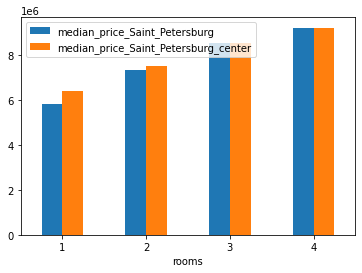

In [57]:
#посмотрим на зависимость цены от количества комнат в квартире
price_rooms_pivot = copy_data_for_spb.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['median'])
price_rooms_pivot_center = copy_data_spb_center.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['median'])
price_rooms_full = price_rooms_pivot.merge(price_rooms_pivot_center, on = 'rooms')
price_rooms_full.columns = ['median_price_Saint_Petersburg', 'median_price_Saint_Petersburg_center']
display(price_rooms_full)
ax = price_rooms_full.plot.bar(rot=0)

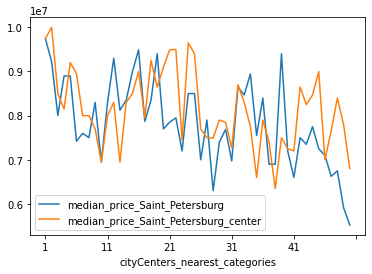

In [65]:
#посмотрим на зависимость цены от расстояния до центра города
copy_data_for_spb['cityCenters_nearest_categories'] = pd.qcut(copy_data_for_spb['cityCenters_nearest'], q=50, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])
cityCenters_nearest_pivot =  copy_data_for_spb.pivot_table(index = 'cityCenters_nearest_categories', values = 'last_price', aggfunc = ['median'])
copy_data_spb_center['cityCenters_nearest_categories'] = pd.qcut(copy_data_spb_center['cityCenters_nearest'], q=50, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])
cityCenters_nearest_pivot_center =  copy_data_spb_center.pivot_table(index = 'cityCenters_nearest_categories', values = 'last_price', aggfunc = ['median'])
cityCenters_nearest_pivot_full = cityCenters_nearest_pivot.merge(cityCenters_nearest_pivot_center, on = 'cityCenters_nearest_categories')
cityCenters_nearest_pivot_full.columns = ['median_price_Saint_Petersburg', 'median_price_Saint_Petersburg_center']
ax = cityCenters_nearest_pivot_full.plot.line(rot=0)

,median_price_Saint_Petersburg,median_price_Saint_Petersburg_center
year,,
2014,8792628.0,9000000
2015,7300000.0,7375000
2016,7750000.0,8000000
2017,7750000.0,8000000
2018,7726960.5,8100000
2019,8000000.0,8200000


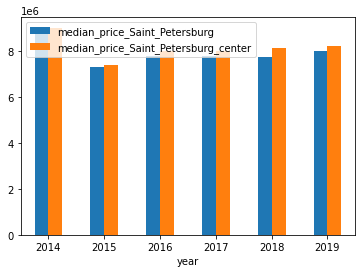

In [66]:
#посмотрим на зависимость цены от года размещения
year_pivot = copy_data_for_spb.pivot_table(index = 'year', values = 'last_price', aggfunc = ['median'])
year_pivot_center = copy_data_spb_center.pivot_table(index = 'year', values = 'last_price', aggfunc = ['median'])
year_pivot_full = year_pivot.merge(year_pivot_center, on = 'year')
year_pivot_full.columns = ['median_price_Saint_Petersburg', 'median_price_Saint_Petersburg_center']
display(year_pivot_full)
ax = year_pivot_full.plot.bar(rot=0)
year_pivot_full_indices = year_pivot_full.reset_index()

In [67]:
max_year_spb = year_pivot_full_indices[year_pivot_full_indices['median_price_Saint_Petersburg'] == year_pivot_full_indices['median_price_Saint_Petersburg'].max()]['year']
min_year_spb = year_pivot_full_indices[year_pivot_full_indices['median_price_Saint_Petersburg'] == year_pivot_full_indices['median_price_Saint_Petersburg'].min()]['year']
max_year_spb_center = year_pivot_full_indices[year_pivot_full_indices['median_price_Saint_Petersburg_center'] == year_pivot_full_indices['median_price_Saint_Petersburg_center'].max()]['year']
min_year_spb_center = year_pivot_full_indices[year_pivot_full_indices['median_price_Saint_Petersburg_center'] == year_pivot_full_indices['median_price_Saint_Petersburg_center'].min()]['year']
print('Пик стоимости жилья в Санкт-Петербурге наблюдался в {} году, минимальная стоимости - в {}'.format(max_year_spb, min_year_spb))
print('Пик стоимости жилья в центральной зоне Санкт-Петербурга наблюдался в {} году, минимальная стоимость - в {}'.format(max_year_spb_center, min_year_spb_center))

Пик стоимости жилья в Санкт-Петербурге наблюдался в 0    2014
Name: year, dtype: int64 году, минимальная стоимости - в 1    2015
Name: year, dtype: int64
Пик стоимости жилья в центральной зоне Санкт-Петербурга наблюдался в 0    2014
Name: year, dtype: int64 году, минимальная стоимость - в 1    2015
Name: year, dtype: int64


,median_price_Saint_Petersburg,median_price_Saint_Petersburg_center
month,,
1,7850000,8000000
2,7500000,7970000
3,7500000,8095000
4,7750000,7900000
5,7812500,8200000
6,7500000,8299000
7,7750000,8270000
8,7500000,7950000
9,8500000,8750000


Пик стоимости жилья в Санкт-Петербурге наблюдается в 8    9
Name: month, dtype: int64 месяце, минимальная стоимость - в 11    12
Name: month, dtype: int64 месяце
Пик стоимости жилья в центральной зоне Санкт-Петербурга наблюдается в 8    9
Name: month, dtype: int64 месяце, минимальная стоимость - в 11    12
Name: month, dtype: int64 месяце


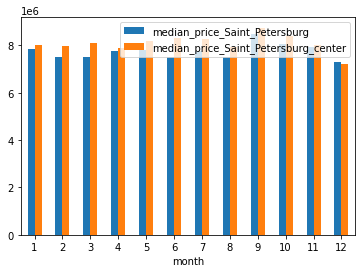

In [68]:
#посмотрим на зависимость цены от месяца размещения 
month_pivot = copy_data_for_spb.pivot_table(index = 'month', values = 'last_price', aggfunc = ['median'])
month_pivot_center = copy_data_spb_center.pivot_table(index = 'month', values = 'last_price', aggfunc = ['median'])
month_pivot_full = month_pivot.merge(month_pivot_center, on = 'month')
month_pivot_full.columns = ['median_price_Saint_Petersburg', 'median_price_Saint_Petersburg_center']
display(month_pivot_full)
ax = month_pivot_full.plot.bar(rot=0)
month_pivot_full_indices = month_pivot_full.reset_index()
max_month_spb = month_pivot_full_indices[month_pivot_full_indices['median_price_Saint_Petersburg'] == month_pivot_full_indices['median_price_Saint_Petersburg'].max()]['month']
min_month_spb = month_pivot_full_indices[month_pivot_full_indices['median_price_Saint_Petersburg'] == month_pivot_full_indices['median_price_Saint_Petersburg'].min()]['month']
max_month_spb_center = month_pivot_full_indices[month_pivot_full_indices['median_price_Saint_Petersburg_center'] == month_pivot_full_indices['median_price_Saint_Petersburg_center'].max()]['month']
min_month_spb_center = month_pivot_full_indices[month_pivot_full_indices['median_price_Saint_Petersburg_center'] == month_pivot_full_indices['median_price_Saint_Petersburg_center'].min()]['month']
print('Пик стоимости жилья в Санкт-Петербурге наблюдается в {} месяце, минимальная стоимость - в {} месяце'.format(max_month_spb, min_month_spb))
print('Пик стоимости жилья в центральной зоне Санкт-Петербурга наблюдается в {} месяце, минимальная стоимость - в {} месяце'.format(max_month_spb_center, min_month_spb_center))

In [69]:
#посмотрим на зависимость цены от дня недели
day_week_pivot = data_for_spb.pivot_table(index = 'day_week', values = 'last_price', aggfunc = ['median'])
day_week_pivot_center = data_spb_center.pivot_table(index = 'day_week', values = 'last_price', aggfunc = ['median'])
day_week_pivot_full = day_week_pivot.merge(day_week_pivot_center, on = 'day_week')
day_week_pivot_full.columns = ['median_price_Saint_Petersburg', 'median_price_Saint_Petersburg_center']
display(day_week_pivot_full)
day_week_pivot_full_indices = day_week_pivot_full.reset_index()
max_day_spb = day_week_pivot_full_indices[day_week_pivot_full_indices['median_price_Saint_Petersburg'] == day_week_pivot_full_indices['median_price_Saint_Petersburg'].max()]['day_week']
min_day_spb = day_week_pivot_full_indices[day_week_pivot_full_indices['median_price_Saint_Petersburg'] == day_week_pivot_full_indices['median_price_Saint_Petersburg'].min()]['day_week']
max_day_spb_center = day_week_pivot_full_indices[day_week_pivot_full_indices['median_price_Saint_Petersburg_center'] == day_week_pivot_full_indices['median_price_Saint_Petersburg_center'].max()]['day_week']
min_day_spb_center = day_week_pivot_full_indices[day_week_pivot_full_indices['median_price_Saint_Petersburg_center'] == day_week_pivot_full_indices['median_price_Saint_Petersburg_center'].min()]['day_week']
print('Пик стоимости жилья в Санкт-Петербурге наблюдается в {}, минимальная стоимость - в {}'.format(max_day_spb, min_day_spb))
print('Пик стоимости жилья в центральной зоне Санкт-Петербурга наблюдается в {}, минимальная стоимость - в {}'.format(max_day_spb_center, min_day_spb_center))

,median_price_Saint_Petersburg,median_price_Saint_Petersburg_center
day_week,,
воскресенье,7970000,8500000
вторник,7833808,7960000
понедельник,7500000,8000000
пятница,8000000,8200000
среда,7850000,8250000
суббота,7600000,7850000
четверг,7800000,7900000


Пик стоимости жилья в Санкт-Петербурге наблюдается в 3    пятница
Name: day_week, dtype: object, минимальная стоимость - в 2    понедельник
Name: day_week, dtype: object
Пик стоимости жилья в центральной зоне Санкт-Петербурга наблюдается в 0    воскресенье
Name: day_week, dtype: object, минимальная стоимость - в 5    суббота
Name: day_week, dtype: object


**Вывод**
- медианная стоимость жилья в центральной зоне Санкт-Петербурга на 246 тыс. руб. выше, чем в целом по городу;
- факт нахождения квартиры на последнем этаже оказывает однонаправленное влияние на ее стоимость в центр. зоне и в СПб в целом: медианная стоимость квартир на последнем и первом этажах ниже, чем на других этажах; 
- с увеличением числа комнат как в СПб, так и в центральной зоне, стоимость квартиры возрастает; 
- в центральной зоне и в целом по СПБ наблюдается схожая зависимость цены от отдаленности от центра;
- как в центр. зоне, так и в СПб максимальная медианная стоимость жилья зарегистрирована в 2014 году; 
- максимальная стоимость жилья как в СПб, так и в центр. зоне наблюдается в августе; 
- минимальная стоимость жилья как в СПб, так и в центр. зоне - в ноябре; 
- максимальная цена продажи в СПб - в пятницу, в центр. зоне - в воскресенье (может быть связано с пиком спроса в выходные дни);
- минимальная цена продажи в СПб - в понедельник, в центр. зоне - в субботу. 

### Шаг 5. Общий вывод

- В проекте был проанализирован архив объявлений о продаже квартир в Санкт-Петербурге в период с 2014 по 2019 год.
- На этапе предобработки данных были заполнены пропуски в значениях высоты потолков, количества этажей, жилой площади, площади кухни, количества дней продажи, принадлежности квартиры к типу апартаменты, количества балконов, парков и водоемов. 
- Пропуски в столбцах 'locality_name', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest', которые возникли предположительно из-за технических ошибок при загрузке картографических данных, были оставлены в датасете. 
- На этапе исследовательского анализа данных были выявлены толстые правые хвосты в распределении параметров площади, количества комнат и дней продажи, высоты потолков и цены. 
- Для устранения выбросов и достижения симметричности распределения были отброшены значения < 5% - перцентиля и > 95% - перцентиля для каждого параметра. 

В результате анализа зависимости цены квартиры от данных параметров для всех локаций можно заключить, что: 
- на цену продажи квартиры оказывают положительное влияние ее площадь и количество комнат; 
- отрицательное влияние на цену продажи квартиры оказывают ее удаленность от центра и нахождение на первом и последнем этажах дома; 
- максимальная стоимость жилья наблюдается в сентябре, самая низкая - в феврале-марте;
- во вторник и среду медианная цена продажи выше, чем в конце недели.

Результаты анализа позволяют выдвинуть следующие гипотезы для дальнейшей проверки: 
- на цену продажи квартиры оказывают положительное влияние ее площадь и количество комнат (однако в случае когда число комнат > 5, зависимость нелинейная); 
- отрицательное влияние на цену продажи квартиры оказывают ее удаленность от центра и нахождение на первом и последнем этажах дома; 
- максимальная стоимость жилья наблюдается в апреле, самая низкая - в июне (может быть обусловлено, например, снижением спроса в летние месяцы из-за его сдвига в пользу частных домов); 
- во вторник и среду медианная цена продажи выше, чем в конце недели.